<b>Importing Dependencies</b>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

<b>EDA and Pre-Processing</b>

In [2]:
# reading the dataset
df = pd.read_csv("./churn_dataset.csv")

In [3]:
# top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# dropping unecessary columns
df.drop('customerID',axis='columns',inplace=True)

In [5]:
# chechking data types
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# string type
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
# float type
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
# handling missing values and changing data type of Total Charges
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
# checking null values
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
# dropping unnecessary columns
df = df[df.TotalCharges!=' ']

In [11]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
pd.to_numeric(df.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [13]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [14]:
df.TotalCharges.dtypes

dtype('float64')

<b>Data Visualization</b>

In [15]:
# customers who are not churning
tenure_churn_no = df[df.Churn=='No'].tenure

In [16]:
# customers who are churning
tenure_churn_yes = df[df.Churn=='Yes'].tenure

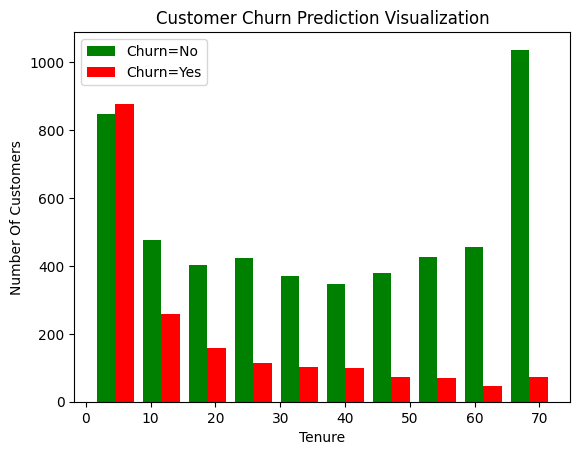

In [17]:
plt.hist([tenure_churn_no,tenure_churn_yes], color=['green','red'], label=['Churn=No','Churn=Yes'])

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.legend()

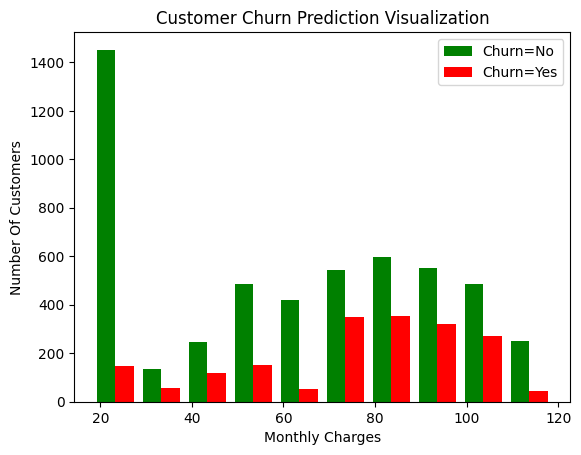

In [18]:
# churning:monthly charges
mc_churn_no = df[df.Churn=='No'].MonthlyCharges
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

plt.hist([mc_churn_no,mc_churn_yes], color=['green','red'], label=['Churn=No','Churn=Yes'])

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.legend()

<b>Label Encoding</b>

In [19]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [20]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [22]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


<b>One Hot Encoding</b>

In [23]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

In [24]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [25]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [26]:
df['gender'].unique()

array([1, 0], dtype=int64)

In [27]:
df = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])

In [28]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [29]:
bool_columns = ['InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 
                'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 
                'PaymentMethod_Bank transfer (automatic)', 
                'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 
                'PaymentMethod_Mailed check']

df[bool_columns] = df[bool_columns].astype(int)

In [30]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

<b>Min-Max Scaling</b>

In [31]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [32]:
for col in df:
    print(f'{col}: {df[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

<b>Train-Test Split</b>

In [33]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [34]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [35]:
X_train.shape

(5625, 26)

In [36]:
X_test.shape

(1407, 26)

<b>Creating the Model</b>

In [37]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)




Epoch 1/100


176/176 [==============================] - 1s 2ms/step - loss: 0.5184 - accuracy: 0.7452
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.7950
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.7998
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.8036
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8028
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8055
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8066
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8075
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4093 - a